# Basic usage

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Symbols can be defined as follows:

In [2]:
x = smp.symbols('x')

You can then use various mathematical operators on the defined symbols

In [3]:
x**2

x**2

In [4]:
smp.sin(x)

sin(x)

There are many many functions built into sympy 

In [5]:
# smp. # press tab to autocomplete and see all functions

Can save expressions in new variables

In [6]:
y = x**2 + 4*x + 3
y

x**2 + 4*x + 3

Do perations on the new variables:

In [7]:
z = y**2
z

(x**2 + 4*x + 3)**2

Note that doesn't expand. There are different methods you need to call to do different things with the expression. 

In [8]:
z.factor()

(x + 1)**2*(x + 3)**2

In [9]:
z.expand()

x**4 + 8*x**3 + 22*x**2 + 24*x + 9

In the notation `smp.solve(f,x)`, sympy finds the value $x$ that makes $f(x) = 0$

In [10]:
smp.solve(z, x)

[-3, -1]

In [11]:
smp.solve(smp.sin(x),x)

[0, pi]

**Good practice**: If you know that your variable $x$ is real (and in some case non-negative), it's good to specify this when you define your variables to prevent complicated issues when solving complicated problems (especially with integrals).

In [12]:
x = smp.symbols('x')
smp.solve(x**2 + 1, x)

[-I, I]

In [13]:
x = smp.symbols('x', real=True, positive=True)
smp.solve(x**2 + 1, x)

[]

Can define many variables at once

In [14]:
x,y,z = smp.symbols('x y z')
F = x**2 + smp.sin(z)*y
F

x**2 + y*sin(z)

Can also solve multivariable expressions, specifying which variable we want to solve for. In each case $F=0$ is being solved for:

In [15]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [16]:
y_sols = smp.solve(F,y)
y_sols

[-x**2/sin(z)]

In [17]:
z_sols = smp.solve(F,z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

Finally, it may be the cas that one has a sympy expression but wants to convert it into a numerical function so they can plot on a computer.

In [18]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [19]:
expr_f = smp.lambdify([x, y], expr)
expr_f

<function _lambdifygenerated(x, y)>

In [20]:
expr_f(1, 2)

3.6651914291880923

In [21]:
expr

asin(x**2/y) + pi

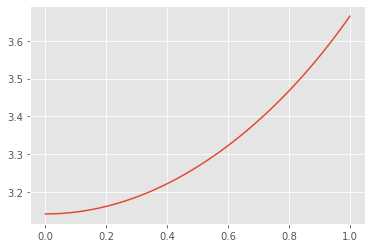

In [22]:
x_num = np.linspace(0,1,100)
y_num = 2

plt.plot(x_num, expr_f(x_num, y_num));

For multivariable expressions, can also substitute values in

In [23]:
F

x**2 + y*sin(z)

In [24]:
F.subs([(y, 3), (z, smp.pi/2)])

x**2 + 3

# Example: solving system of equations

A falling object encounters a moving platform accelerating upwards:

1. Object $h_o(t) = h_0 - v_o t - \frac{1}{2}gt^2$
2. Platform $h_p(t) = v_p t + \frac{1}{2}qt^2$

**Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.**

We need to solve for $v_0$ and $t$ in the two equations

1. $h_0(t) = h_p(t)$
2. $ \frac{dh_0}{dt} (t) = - \frac{dh_p}{dt}(t) $

In sympy, need to construct our system of equations as $EQ_1=0$, $EQ_2=0$, ... In our case, we rewrite them as

1. $h_0(t) - h_p(t) = 0$
2. $\frac{dh_0}{dt} + \frac{dh_p}{dt} = 0$

In [25]:
t, h0, 

NameError: name 't' is not defined